<a href="https://colab.research.google.com/github/inokchoi/ComputerVision/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import time

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [ ]:
!pip install livelossplot # Beautiful liveloss plot for jupyter
from livelossplot import PlotLosses 
from IPython.display import clear_output

In [ ]:
start_time = time.time()

total_epoch = 100
batch_size = 100
learning_rate = 0.0002

n_hidden = 256
n_input = 28 * 28
n_noise = 128

In [ ]:
X = tf.placeholder(tf.float32, [None, n_input])
Z = tf.placeholder(tf.float32, [None, n_noise])

In [ ]:
#############################################################################
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W1_2 = tf.Variable(tf.random_normal([n_hidden, n_hidden], stddev=0.01))
G_b1_2 = tf.Variable(tf.zeros([n_hidden]))
G_W1_3 = tf.Variable(tf.random_normal([n_hidden, n_hidden], stddev=0.01))
G_b1_3 = tf.Variable(tf.zeros([n_hidden]))
G_W1_4 = tf.Variable(tf.random_normal([n_hidden, n_hidden], stddev=0.01))
G_b1_4 = tf.Variable(tf.zeros([n_hidden]))
G_W1_5 = tf.Variable(tf.random_normal([n_hidden, n_hidden], stddev=0.01))
G_b1_5 = tf.Variable(tf.zeros([n_hidden]))
G_W1_6 = tf.Variable(tf.random_normal([n_hidden, n_hidden], stddev=0.01))
G_b1_6 = tf.Variable(tf.zeros([n_hidden]))
G_W1_7 = tf.Variable(tf.random_normal([n_hidden, n_hidden], stddev=0.01))
G_b1_7 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
D_W1_2 = tf.Variable(tf.random_normal([n_hidden, n_hidden], stddev=0.01))
D_b1_2 = tf.Variable(tf.zeros([n_hidden]))
D_W1_3 = tf.Variable(tf.random_normal([n_hidden, n_hidden], stddev=0.01))
D_b1_3 = tf.Variable(tf.zeros([n_hidden]))
D_W1_4 = tf.Variable(tf.random_normal([n_hidden, n_hidden], stddev=0.01))
D_b1_4 = tf.Variable(tf.zeros([n_hidden]))
D_W1_5 = tf.Variable(tf.random_normal([n_hidden, n_hidden], stddev=0.01))
D_b1_5 = tf.Variable(tf.zeros([n_hidden]))
D_W1_6 = tf.Variable(tf.random_normal([n_hidden, n_hidden], stddev=0.01))
D_b1_6 = tf.Variable(tf.zeros([n_hidden]))
D_W1_7 = tf.Variable(tf.random_normal([n_hidden, n_hidden], stddev=0.01))
D_b1_7 = tf.Variable(tf.zeros([n_hidden]))
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1]))

def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1)
    hidden = tf.nn.relu(tf.matmul(hidden, G_W1_2) + G_b1_2)
    hidden = tf.nn.relu(tf.matmul(hidden, G_W1_3) + G_b1_3)
    hidden = tf.nn.relu(tf.matmul(hidden, G_W1_4) + G_b1_4)
    hidden = tf.nn.relu(tf.matmul(hidden, G_W1_5) + G_b1_5)
    hidden = tf.nn.relu(tf.matmul(hidden, G_W1_6) + G_b1_6)
    hidden = tf.nn.relu(tf.matmul(hidden, G_W1_7) + G_b1_7)
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2)
    return output

def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)
    hidden = tf.nn.relu(tf.matmul(hidden, D_W1_2) + D_b1_2)
    hidden = tf.nn.relu(tf.matmul(hidden, D_W1_3) + D_b1_3)
    hidden = tf.nn.relu(tf.matmul(hidden, D_W1_4) + D_b1_4)
    hidden = tf.nn.relu(tf.matmul(hidden, D_W1_5) + D_b1_5)
    hidden = tf.nn.relu(tf.matmul(hidden, D_W1_6) + D_b1_6)
    hidden = tf.nn.relu(tf.matmul(hidden, D_W1_7) + D_b1_7)
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2)
    return output

D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]
#############################################################################

In [ ]:
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))

In [ ]:
G = generator(Z)
D_gene = discriminator(G)
D_real = discriminator(X)

loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))
loss_G = tf.reduce_mean(tf.log(D_gene))

train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D, var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G, var_list=G_var_list)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

In [ ]:
liveloss = PlotLosses()

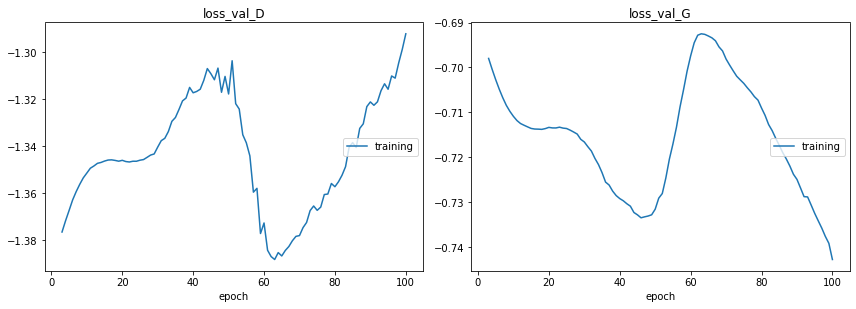

loss_val_D:
training   (min:   -1.388, max:   -1.292, cur:   -1.292)

loss_val_G:
training   (min:   -0.743, max:   -0.693, cur:   -0.743)
최적화 완료!


In [ ]:
%matplotlib inline
for epoch in range(total_epoch):
    logs = {}
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Z: noise})

    print('Epoch:', '%04d' % epoch, 'D loss: {:.4}'.format(loss_val_D), 'G loss: {:.4}'.format(loss_val_G))
    logs['loss_val_D'] = loss_val_D
    logs['loss_val_G'] = loss_val_G

    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})

        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i], (28, 28)))

        if not os.path.isdir('./samples'):
            os.mkdir('./samples')

        plt.savefig('./samples/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        plt.close(fig)

    liveloss.update(logs)
    liveloss.draw()

print('최적화 완료!')

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 346.73645663261414 seconds ---
